 [1] "/title/tt5536736/?ref_=nm_flmg_act_1" 
 [2] "/title/tt5057130/?ref_=nm_flmg_act_2" 
 [3] "/title/tt2267968/?ref_=nm_flmg_act_3" 
 [4] "/title/tt5513770/?ref_=nm_flmg_act_4" 
 [5] "/title/tt3083008/?ref_=nm_flmg_act_5" 
 [6] "/title/tt3205394/?ref_=nm_flmg_act_6" 
 [7] "/title/tt3203616/?ref_=nm_flmg_act_7" 
 [8] "/title/tt3302706/?ref_=nm_flmg_act_8" 
 [9] "/title/tt2883512/?ref_=nm_flmg_act_9" 
[10] "/title/tt5241256/?ref_=nm_flmg_act_10"
[11] "/title/tt1578887/?ref_=nm_flmg_act_11"
[12] "/title/tt1980162/?ref_=nm_flmg_act_12"
[13] "/title/tt1302011/?ref_=nm_flmg_act_13"
[14] "/title/tt0970866/?ref_=nm_flmg_act_14"
[15] "/title/tt1702433/?ref_=nm_flmg_act_15"
[16] "/title/tt1423894/?ref_=nm_flmg_act_16"
[17] "/title/tt0420238/?ref_=nm_flmg_act_17"
[18] "/title/tt1287845/?ref_=nm_flmg_act_18"
[19] "/title/tt1046947/?ref_=nm_flmg_act_19"
[20] "/title/tt1470016/?ref_=nm_flmg_act_20"
[21] "/title/tt0441773/?ref_=nm_flmg_act_21"
[22] "/title/tt0457419/?ref_=nm_flmg_act_22"
[23] "/tit

function (x, ...) 
UseMethod("print")
<bytecode: 0x7f8f2eaa82a8>
<environment: namespace:base>

  [1]  NA  NA  NA  NA  NA  NA 4.8 6.6 6.0 6.6 6.1 6.9 7.2 7.1 5.3 6.4 8.1 7.3
 [19] 6.6 6.3 5.4 5.6 7.8 4.6 6.4 6.2 5.7 6.5 7.4 5.9 8.2 5.5 5.4 6.7 7.2 6.0
 [37] 5.7 7.7 6.7 6.0 8.4 5.9 5.1 6.3 6.0 4.8 5.9 6.1 5.5 6.8 6.1 7.0 7.2 4.2
 [55] 6.4 6.7 7.3 6.8 7.1 7.5 6.9 6.7 7.6 5.8 8.2 8.2 6.1 6.4 7.8 7.3 6.2 5.8
 [73] 5.4 7.3 6.7 6.5 7.8 8.7 6.3 6.0 6.4 7.6 7.9 7.9 7.3 7.5 8.0 6.5 8.4 7.8
 [91] 6.4 8.2 8.2 9.5 6.7 6.3 7.7 8.3 9.0 7.4 7.0 5.0 5.7 4.7 6.2 5.6 3.7 5.0
[109] 5.8 6.3 7.0 7.4


Warning message:
“Ignoring unknown parameters: binwidth”Warning message:
“Ignoring unknown parameters: binwidth”Warning message:
“Removed 1 rows containing non-finite values (stat_density).”Warning message:
“Removed 6 rows containing non-finite values (stat_density).”

Saving 7 x 7 in image
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”Warning message:
“Removed 6 rows containing non-finite values (stat_density).”Warning message:
“Removed 1 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 6 rows containing non-finite values (stat_ecdf).”

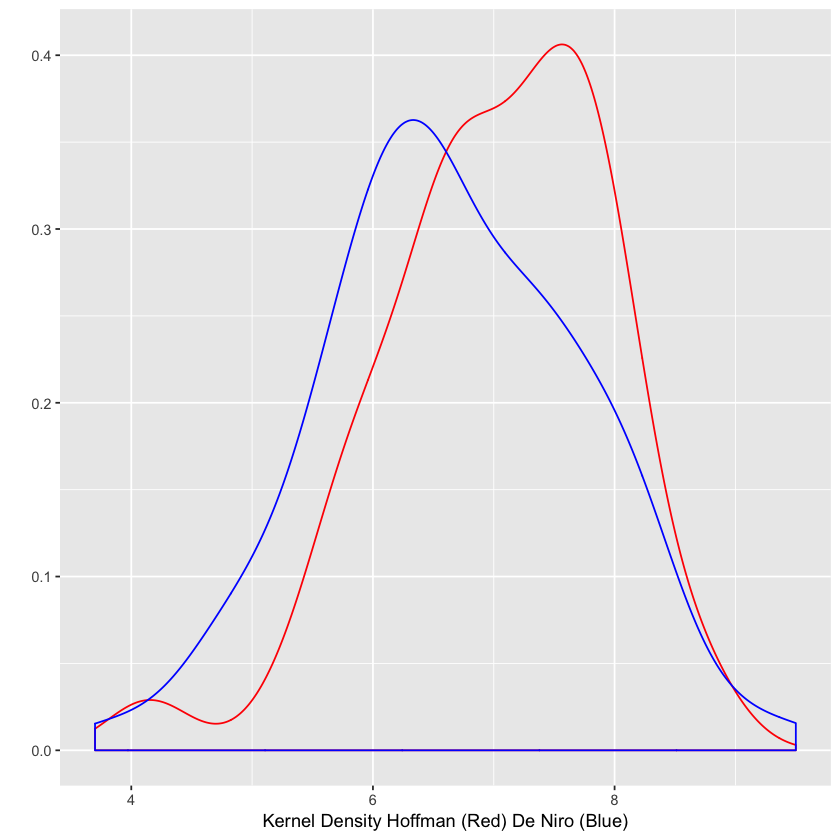

Saving 7 x 7 in image
Warning message:
“Removed 1 rows containing non-finite values (stat_ecdf).”Warning message:
“Removed 6 rows containing non-finite values (stat_ecdf).”

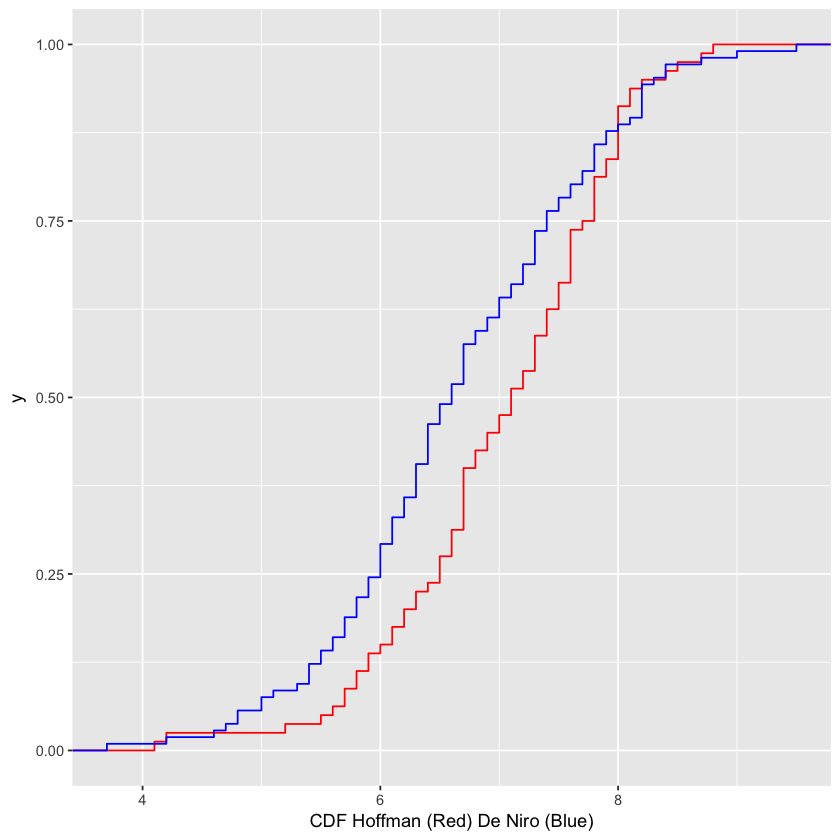

In [8]:
library(rvest)
library(stringi)
library(ggplot2)
library(urltools)


baseurl="http://www.imdb.com/name/"
dh="nm0000163"
rdn='nm0000134'



#Clear, define library, and set directory

link=paste(baseurl,dh,sep='')
      

#Open a new session linking to Hoffman's page and read the links to his filmography

session <- html_session(link)
content <- read_html(session)



hoffman_links <- html_nodes(content,"#filmo-head-actor+ .filmo-category-section b a" )
hoffman_links <- html_attr(hoffman_links, "href")



#Create an empty vector of Hoffman's ratings
number_hoffman <- length(hoffman_links)
hoffman_ratings<- c()

#Loop over the links and extract the ratings vector
for(i in 1:number_hoffman){
  session <- session %>% jump_to(hoffman_links[i])
  movie <- read_html(session)
  rating <- html_nodes(movie,".ratingValue strong span")
  if (length(rating)>0){
    textrating <- html_text(rating)
    hoffman_ratings[i] <- as.numeric(textrating)
  }
}

print(hoffman_links)
print(hoffman_ratings)

#Open a new session linking to De Niro's page and read the links to his filmography
link2=paste(baseurl,rdn,sep='')

session2 <- html_session(link2)
content2 <- read_html(session2)
deniro_links <- content2 %>% html_nodes("#filmo-head-actor+ .filmo-category-section b a")
deniro_links <- deniro_links %>% html_attr("href")

#Create an empty vector of DeNiro's ratings
number_deniro <- length(deniro_links)
deniro_ratings<- c()
print
#Loop over the links and extract the ratings vector
for(j in 1:number_deniro){
  session2 <- session2 %>% jump_to(deniro_links[j])
  movie2 <- read_html(session2)
  rating2 <- html_nodes(movie2,".ratingValue strong span")
  if (length(rating2)>0){
    textrating2 <- html_text(rating2)
    deniro_ratings[j] <- as.numeric(textrating2)
  }
}
print(deniro_ratings)

# Kernel Density Estimation

library(tidyverse)

hoffman <- as.data.frame(hoffman_ratings)
deniro <- as.data.frame(deniro_ratings)
ggplot(hoffman, aes(hoffman_ratings))+
  geom_density(data=hoffman, aes(hoffman_ratings,..density..),color="red",binwidth = 0.5)+
  geom_density(data=deniro, aes(deniro_ratings,..density..),color="blue",binwidth = 0.5)+
  xlab("Kernel Density Hoffman (Red) De Niro (Blue)" )+
  ylab("")
ggsave("~/Desktop/kernel.png")

# CDF
ggplot(hoffman, aes(hoffman_ratings))+
  stat_ecdf(data=hoffman, aes(hoffman_ratings),color="red")+
  stat_ecdf(data=deniro, aes(deniro_ratings),color="blue")+
  xlab("CDF Hoffman (Red) De Niro (Blue)")
ggsave("~/Desktop/cdf.png")


